Exploratory analysis of Twitter Data

In [37]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np

%matplotlib inline

In [38]:
df_raw_tweet = pd.read_csv('./Datasets/Twitter_Training_Data.csv', encoding='latin1')
print (df_raw_tweet.head())

       Tweet id                                    Tweet_permalink  \
0  9.799020e+17  https://twitter.com/tippingpoint/status/979902...   
1  9.798700e+17  https://twitter.com/tippingpoint/status/979869...   
2  9.798630e+17  https://twitter.com/tippingpoint/status/979862...   
3  9.797680e+17  https://twitter.com/tippingpoint/status/979767...   
4  9.794570e+17  https://twitter.com/tippingpoint/status/979457...   

                                          Tweet_text        Attribute  \
0  Thank you to our #TippingPointGrantees! It's a...  Event Promotion   
1  .@NewTeacherCtr's newly released program stand...        Education   
2  The majority of our chronically homeless neigh...     Homelessness   
3  Congratulations to AD-10 Woman of the Year Luc...      Immigration   
4  Thanks for the shout out @New_Sincerity! Our i...       Nonprofits   

                     time  impressions  engagements  url clicks  
0  2018-03-31 02:05 +0000          980            9           5  
1  2018-

In [39]:
dummy_ranks = pd.get_dummies(df_raw_tweet['Attribute'])
print(dummy_ranks.head())

   Corporate Social Responsibility  Criminal Justice  Data  Early Childhood  \
0                                0                 0     0                0   
1                                0                 0     0                0   
2                                0                 0     0                0   
3                                0                 0     0                0   
4                                0                 0     0                0   

   Education  Employment  Event Promotion  Fire Relief  Homelessness  \
0          0           0                1            0             0   
1          1           0                0            0             0   
2          0           0                0            0             1   
3          0           0                0            0             0   
4          0           0                0            0             0   

   Immigration  Nonprofits  Philanthropy  Poverty  R+D  Race  
0            0           0   

In [40]:
cols_to_keep = ['impressions', 'engagements', 'url clicks']
df_tweet = df_raw_tweet[cols_to_keep].join(dummy_ranks.loc[:, 'Corporate':])
print(df_tweet.head())

   impressions  engagements  url clicks  Corporate Social Responsibility  \
0          980            9           5                                0   
1         2676           40           4                                0   
2         1352           10           1                                0   
3         1018            5           0                                0   
4          869            2           0                                0   

   Criminal Justice  Data  Early Childhood  Education  Employment  \
0                 0     0                0          0           0   
1                 0     0                0          1           0   
2                 0     0                0          0           0   
3                 0     0                0          0           0   
4                 0     0                0          0           0   

   Event Promotion  Fire Relief  Homelessness  Immigration  Nonprofits  \
0                1            0             0         

In [41]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
impressions                        100 non-null int64
engagements                        100 non-null int64
url clicks                         100 non-null int64
Corporate Social Responsibility    100 non-null uint8
Criminal Justice                   100 non-null uint8
Data                               100 non-null uint8
Early Childhood                    100 non-null uint8
Education                          100 non-null uint8
Employment                         100 non-null uint8
Event Promotion                    100 non-null uint8
Fire Relief                        100 non-null uint8
Homelessness                       100 non-null uint8
Immigration                        100 non-null uint8
Nonprofits                         100 non-null uint8
Philanthropy                       100 non-null uint8
Poverty                            100 non-null uint8
R+D                             

In [42]:
df_tweet.count()

impressions                        100
engagements                        100
url clicks                         100
Corporate Social Responsibility    100
Criminal Justice                   100
Data                               100
Early Childhood                    100
Education                          100
Employment                         100
Event Promotion                    100
Fire Relief                        100
Homelessness                       100
Immigration                        100
Nonprofits                         100
Philanthropy                       100
Poverty                            100
R+D                                100
Race                               100
dtype: int64

In [43]:
print(df_tweet.describe())

        impressions  engagements  url clicks  Corporate Social Responsibility  \
count    100.000000   100.000000  100.000000                       100.000000   
mean    1575.740000    17.490000    2.890000                         0.030000   
std     2147.196733    29.522631    4.636036                         0.171447   
min       50.000000     0.000000    0.000000                         0.000000   
25%      865.000000     5.000000    0.000000                         0.000000   
50%     1146.500000    10.500000    1.000000                         0.000000   
75%     1485.250000    20.000000    4.250000                         0.000000   
max    17606.000000   273.000000   23.000000                         1.000000   

       Criminal Justice        Data  Early Childhood   Education  Employment  \
count            100.00  100.000000       100.000000  100.000000  100.000000   
mean               0.01    0.030000         0.040000    0.180000    0.050000   
std                0.10    0.1

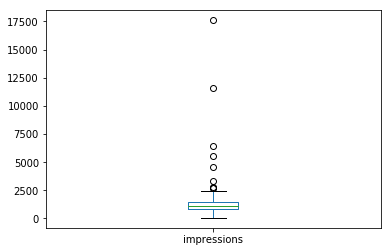

In [44]:
df_tweet['impressions'].plot(kind='box');

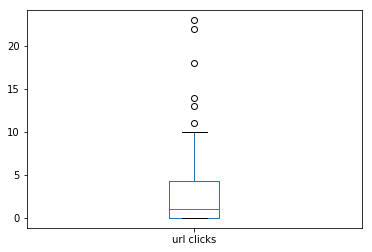

In [45]:
df_tweet['url clicks'].plot(kind='box');

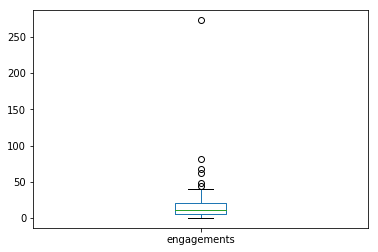

In [46]:
df_tweet['engagements'].plot(kind='box');

In [47]:
df_tweet.skew()

impressions                         5.499902
engagements                         6.871956
url clicks                          2.313933
Corporate Social Responsibility     5.594649
Criminal Justice                   10.000000
Data                                5.594649
Early Childhood                     4.766655
Education                           1.691330
Employment                          4.192637
Event Promotion                     3.762137
Fire Relief                         3.762137
Homelessness                        1.111041
Immigration                         5.594649
Nonprofits                          3.422153
Philanthropy                        4.766655
Poverty                             5.594649
R+D                                 6.962011
Race                                2.909132
dtype: float64

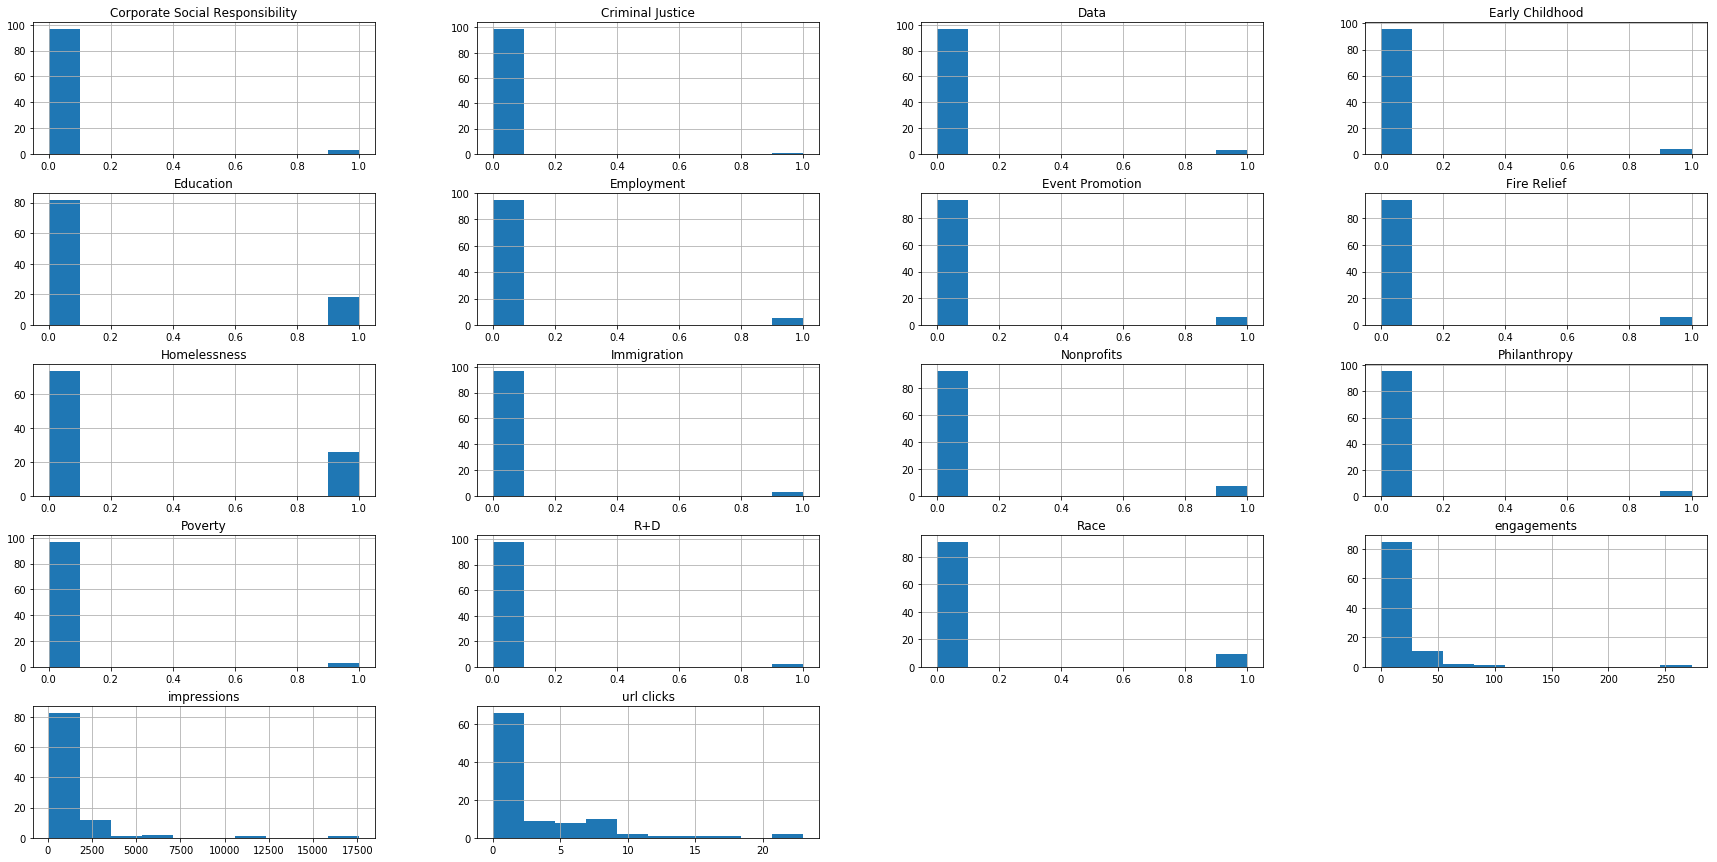

In [48]:
df_tweet.hist(figsize=(30,15));

In [49]:
df_tweet.corr()

,impressions,engagements,url clicks,Corporate Social Responsibility,Criminal Justice,Data,Early Childhood,Education,Employment,Event Promotion,Fire Relief,Homelessness,Immigration,Nonprofits,Philanthropy,Poverty,R+D,Race
impressions,1.000000,0.882013,0.634864,-0.010076,-0.026191,-0.035759,0.024174,-0.074688,-0.066377,0.463889,0.019878,0.002921,-0.046295,-0.103543,-0.041011,-0.052908,-0.027398,-0.042307
engagements,0.882013,1.000000,0.605641,0.036979,-0.032470,-0.038855,0.088669,-0.096426,-0.069431,0.412925,-0.075888,0.053754,-0.056816,-0.129996,-0.050311,-0.020894,-0.053447,-0.005246
url clicks,0.634864,0.605641,1.000000,0.156694,-0.041179,-0.046640,0.126560,-0.169396,-0.054211,0.352905,-0.039617,0.073443,-0.110181,-0.163390,-0.116824,-0.008515,-0.089503,0.098402
Corporate Social Responsibility,-0.010076,0.036979,0.156694,1.000000,-0.017675,-0.030928,-0.035898,-0.082396,-0.040346,-0.044431,-0.044431,-0.104243,-0.030928,-0.048248,-0.035898,-0.030928,-0.025123,-0.055306
Criminal Justice,-0.026191,-0.032470,-0.041179,-0.017675,1.000000,-0.017675,-0.020515,-0.047088,-0.023057,-0.025392,-0.025392,-0.059574,-0.017675,-0.027573,-0.020515,-0.017675,-0.014358,-0.031607
Data,-0.035759,-0.038855,-0.046640,-0.030928,-0.017675,1.000000,-0.035898,-0.082396,-0.040346,-0.044431,-0.044431,-0.104243,-0.030928,-0.048248,-0.035898,-0.030928,-0.025123,-0.055306
Early Childhood,0.024174,0.088669,0.126560,-0.035898,-0.020515,-0.035898,1.000000,-0.095637,-0.046829,-0.051571,-0.051571,-0.120994,-0.035898,-0.056002,-0.041667,-0.035898,-0.029161,-0.064194
Education,-0.074688,-0.096426,-0.169396,-0.082396,-0.047088,-0.082396,-0.095637,1.000000,-0.107486,-0.118370,-0.118370,-0.277716,-0.082396,-0.128540,-0.095637,-0.082396,-0.066932,-0.147343
Employment,-0.066377,-0.069431,-0.054211,-0.040346,-0.023057,-0.040346,-0.046829,-0.107486,1.000000,-0.057961,-0.057961,-0.135986,-0.040346,-0.062941,-0.046829,-0.040346,-0.032774,-0.072148
Event Promotion,0.463889,0.412925,0.352905,-0.044431,-0.025392,-0.044431,-0.051571,-0.118370,-0.057961,1.000000,-0.063830,-0.149755,-0.044431,-0.069314,-0.051571,-0.044431,-0.036092,-0.079453
